# **Importing Required Libraries**

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import jaccard_score, f1_score
import os
import tensorflow as tf

# **Gaussian Mixture Model (GMM) for Image Segmentation**

## **Function Overview**
This function applies Gaussian Mixture Model (GMM) for image segmentation. It ensures that the segmented mask has a white foreground (255) and a black background (0).


In [ ]:
def segment_gmm(image, num_components=2):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    pixels = gray.reshape(-1, 1)
        
    # Fit GMM
    gmm = GaussianMixture(n_components=num_components, covariance_type="tied", random_state=42)
    gmm.fit(pixels)
    labels = gmm.predict(pixels)
    
    # Reshape back to image
    segmented = labels.reshape(gray.shape)
    
    # Assign the brighter region as mask (white)
    label0_mean = np.mean(gray[segmented == 0])
    label1_mean = np.mean(gray[segmented == 1])
    mask_label = 1 if label1_mean > label0_mean else 0
    mask = (segmented == mask_label).astype(np.uint8) * 255
    
    return mask

# **Otsu's Thresholding for Image Segmentation**    

## **Function Overview**
This function segments an image using Otsu's thresholding, which automatically determines the optimal threshold value for separating the foreground from the background.


In [ ]:
def segment_otsu(image):
    """
    Segments the mask using Otsu's thresholding.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return mask

# **Watershed Algorithm for Image Segmentation**

## **Function Overview**
This function applies the Watershed Algorithm to segment an image into foreground and background regions. Watershed is useful for separating overlapping objects.

In [ ]:
def segment_watershed(image):
    """
    Segments the mask using Watershed Algorithm.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Noise removal
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)

    # Unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labeling
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply Watershed
    image_copy = image.copy()
    cv2.watershed(image_copy, markers)
    mask = np.uint8(markers > 1) * 255  # Convert to binary mask
    
    return mask

# **Compute Segmentation Metrics: IoU and Dice Score**

## **Function Overview**
This function computes two key evaluation metrics for segmentation tasks:

IoU (Intersection over Union)

Dice Score (F1 Score for segmentation)


In [ ]:
def compute_metrics(seg_mask, ground_truth):
    """
    Computes IoU (Intersection over Union) and Dice Score.
    """
    seg_mask = (seg_mask > 0).astype(np.uint8).flatten()
    ground_truth = (ground_truth > 0).astype(np.uint8).flatten()
    
    iou = jaccard_score(ground_truth, seg_mask)
    dice = f1_score(ground_truth, seg_mask)  # Dice Score = 2 * (|X ∩ Y|) / (|X| + |Y|)

    return iou, dice

# **Face Segmentation Evaluation**
This script processes images from a dataset, applies three different segmentation methods (GMM, Otsu, and Watershed), computes evaluation metrics (IoU and Dice coefficient) by comparing against ground truth masks, and displays the results with corresponding metrics. 

The code loads each image and its corresponding ground truth mask, applies the segmentation methods, calculates performance metrics, and visualizes the results in a 2x3 grid showing:
- Original image
- Ground truth mask
- GMM segmentation with metrics
- Otsu segmentation with metrics
- Watershed segmentation with metrics

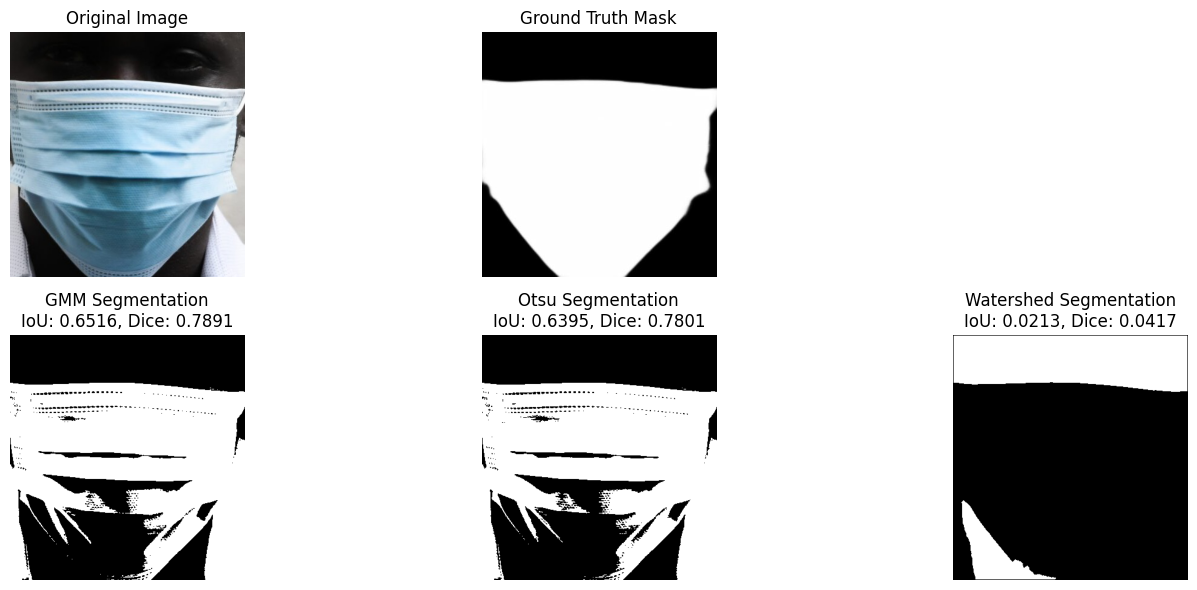

c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


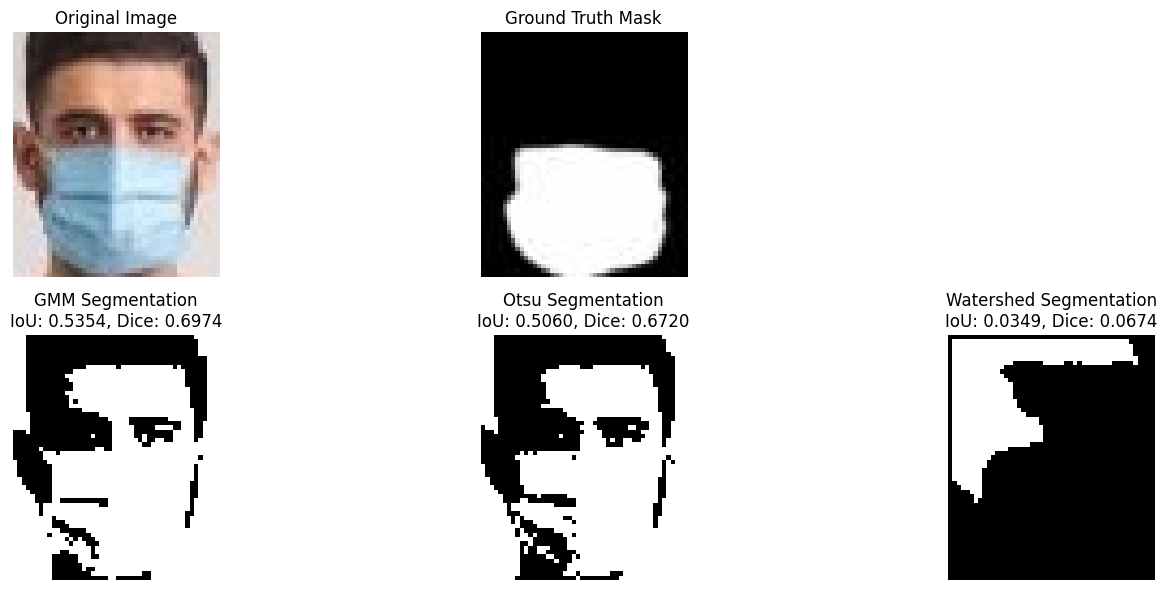

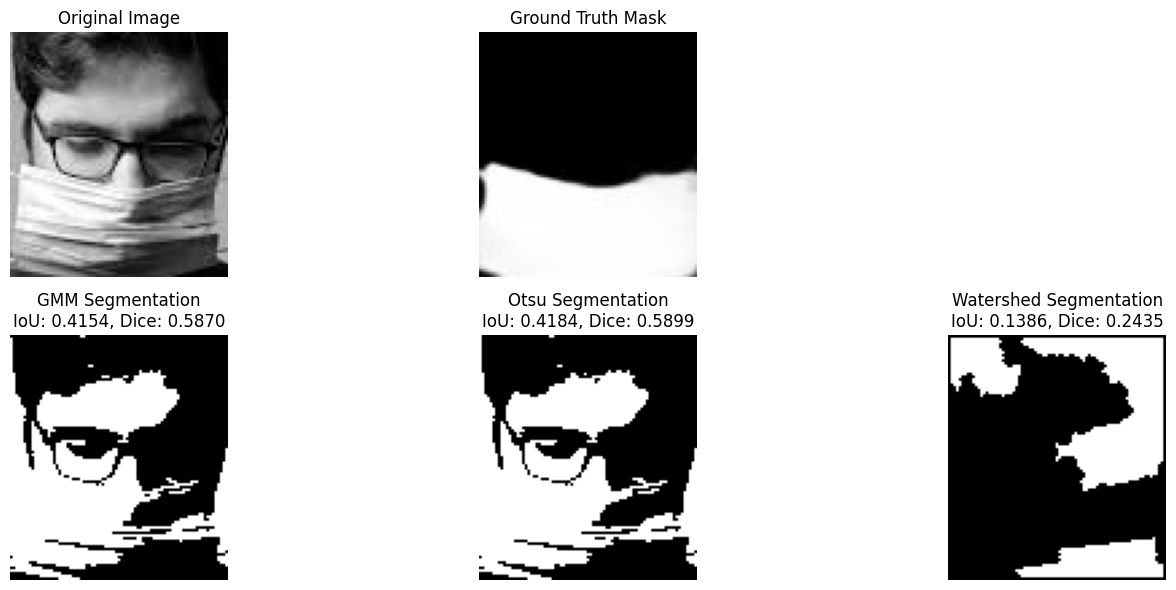

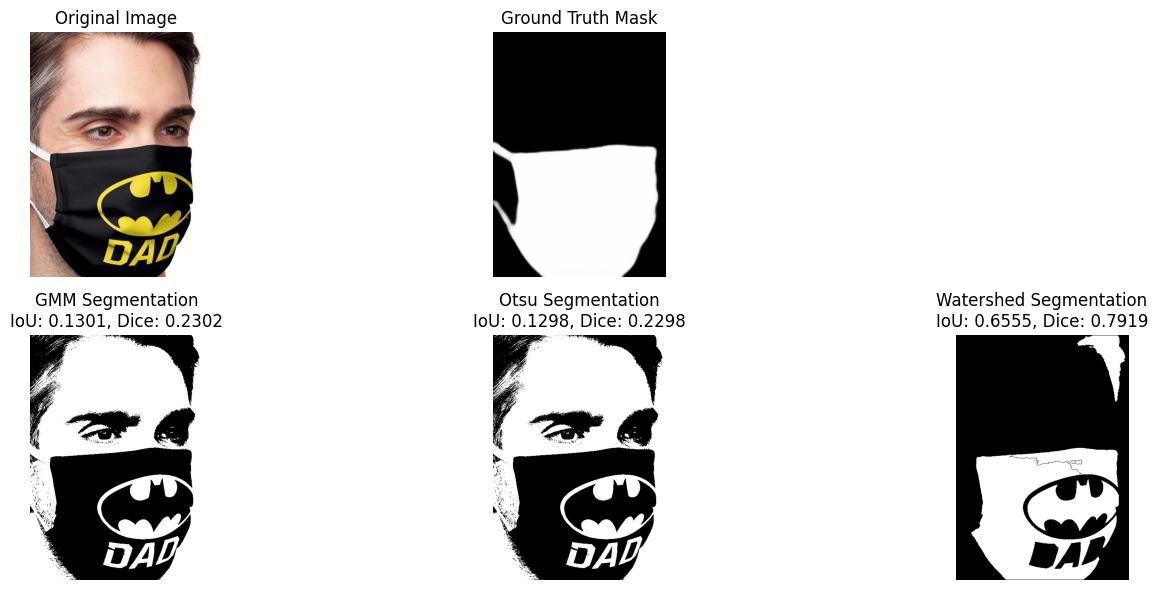

c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


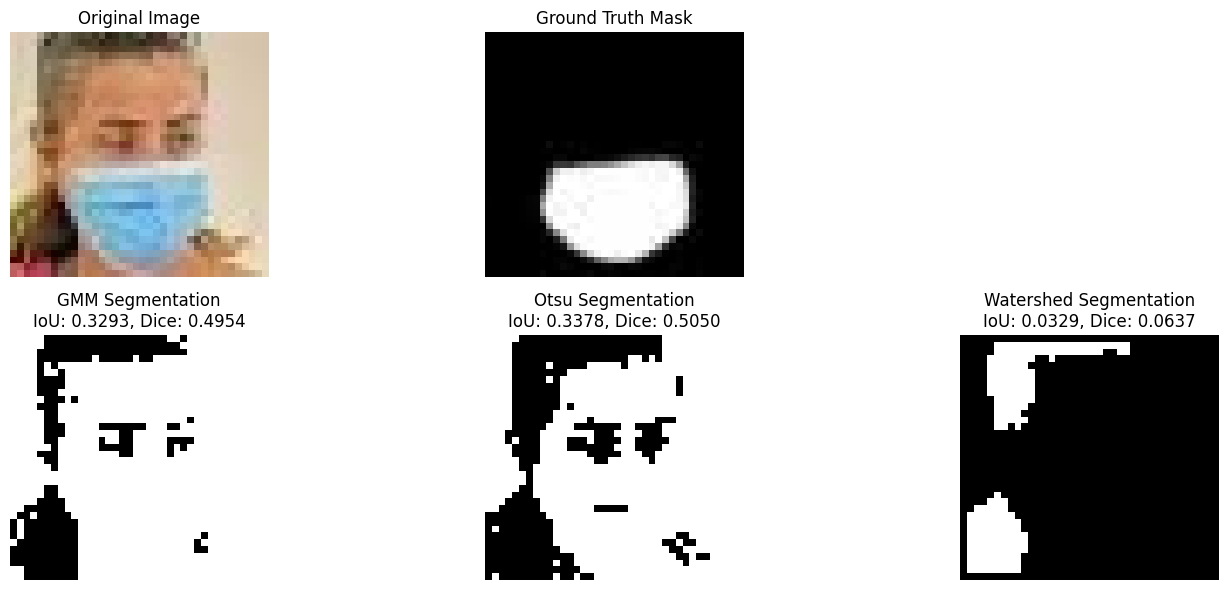

c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


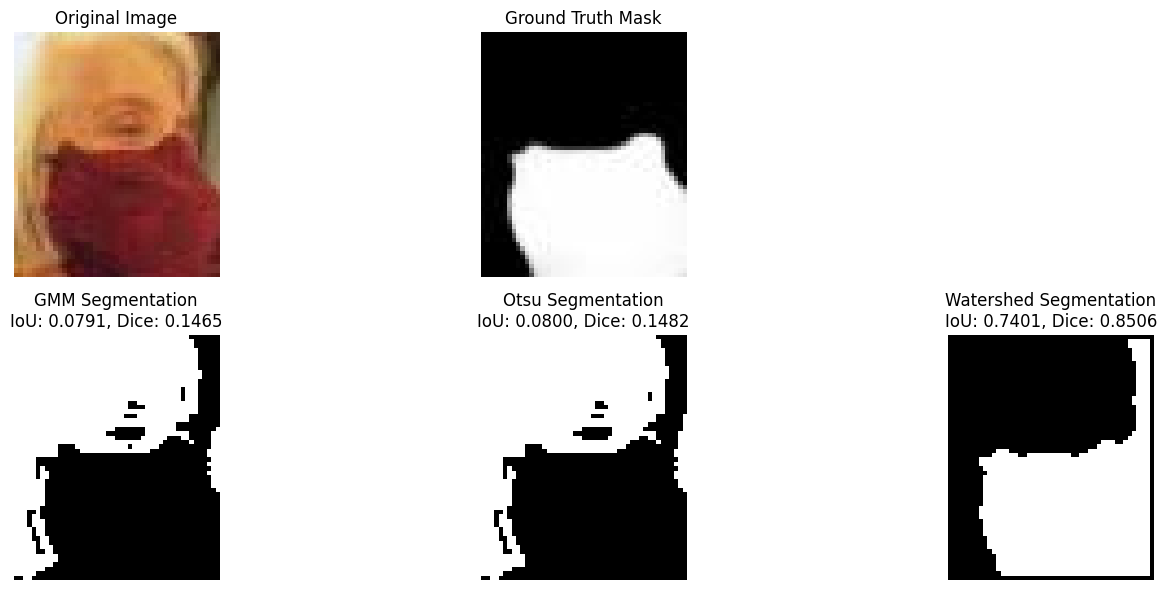

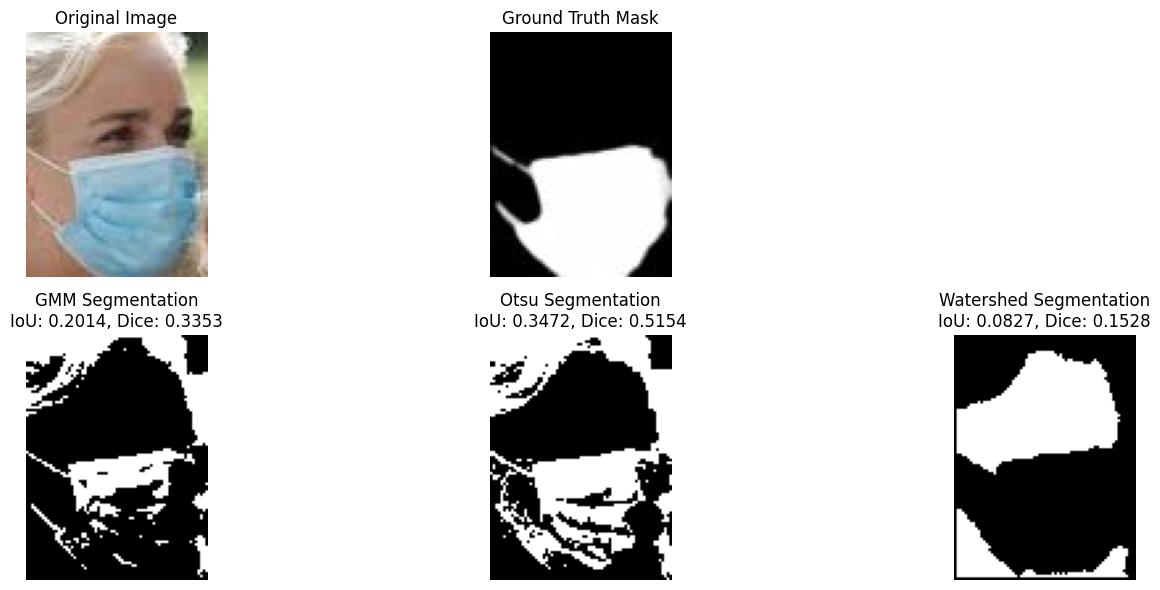

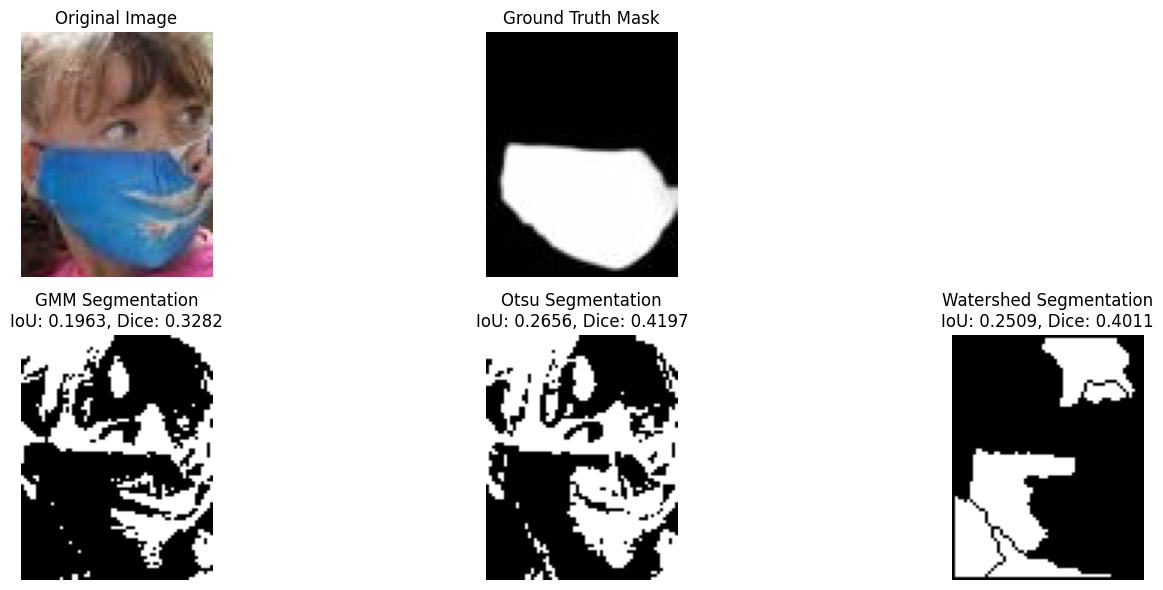

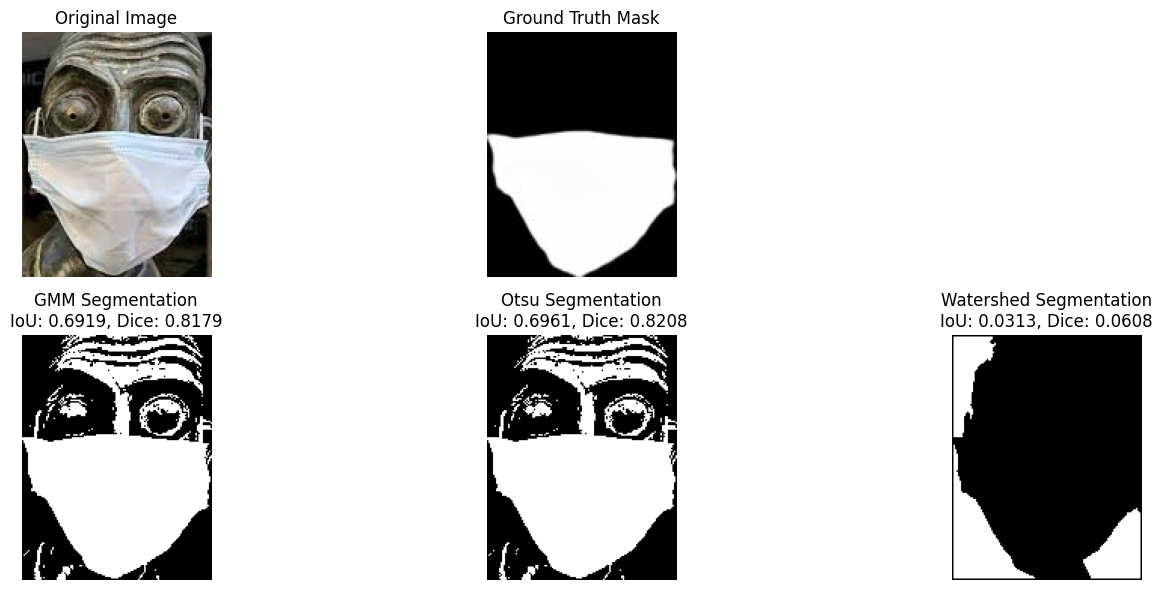

c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


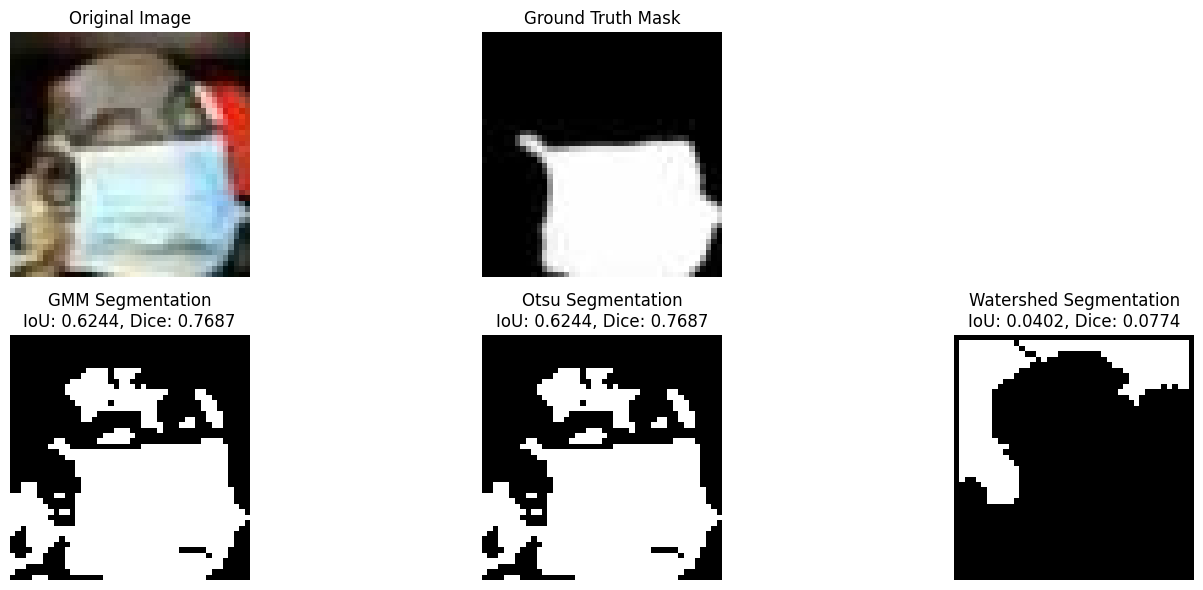

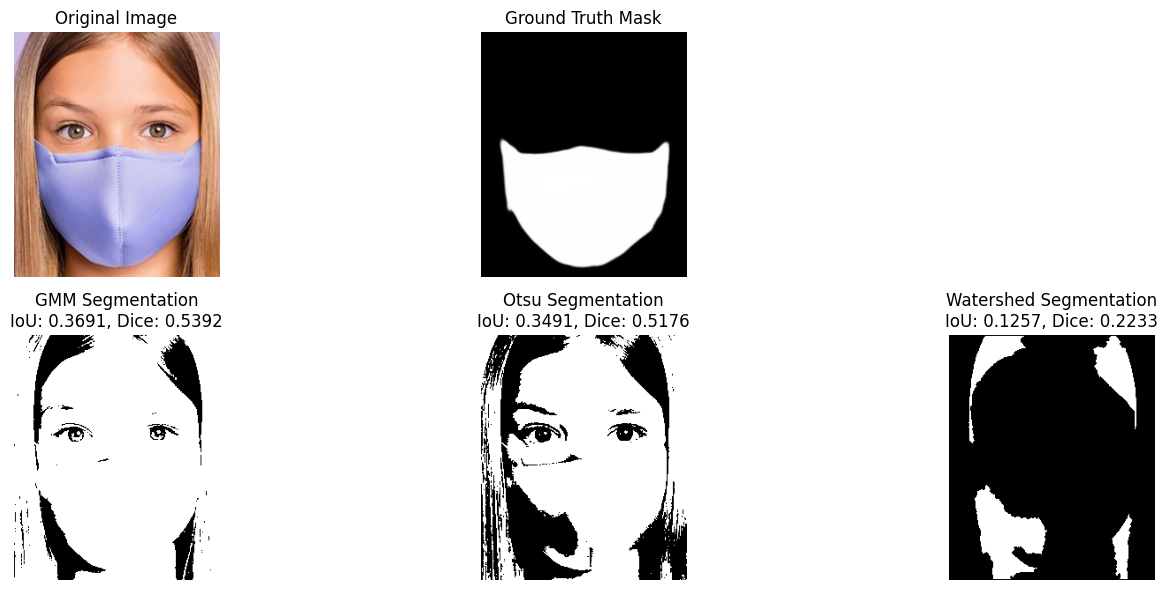

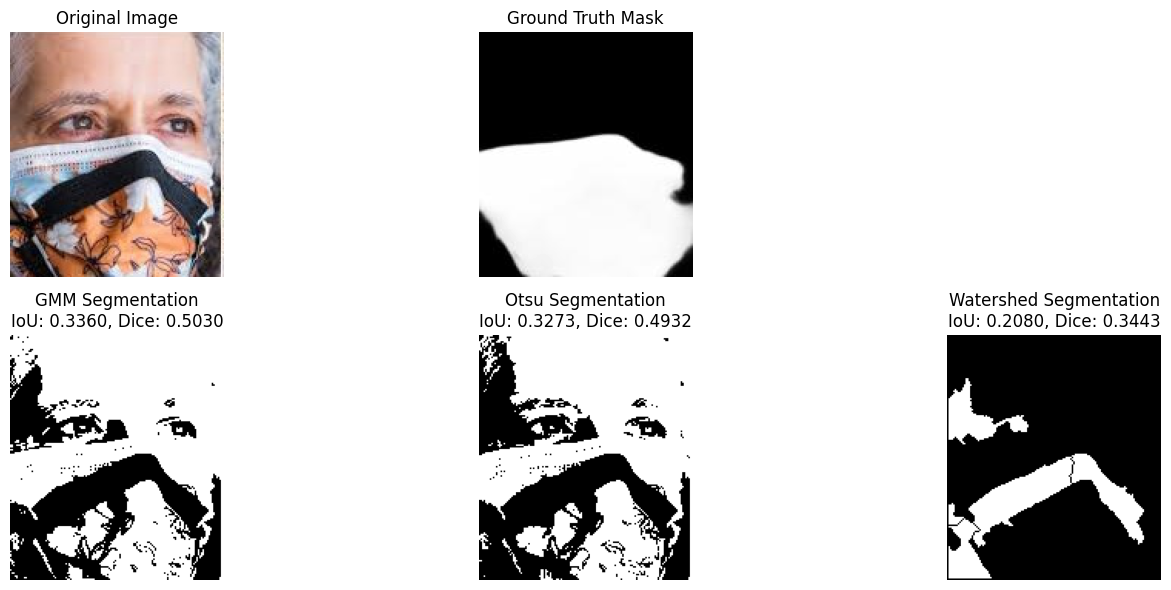

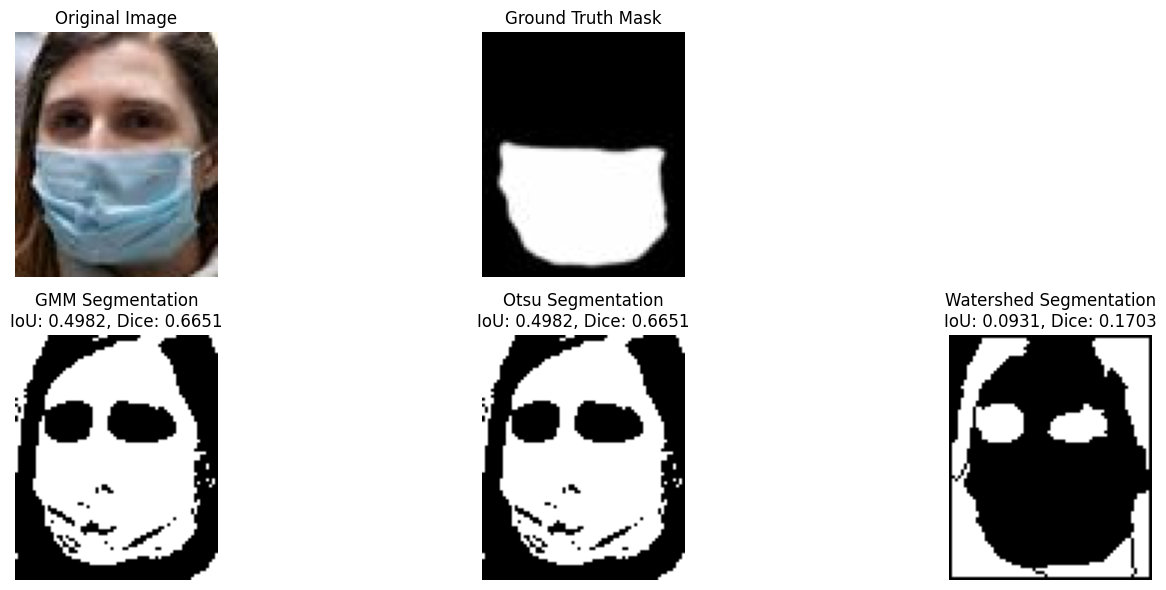

c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


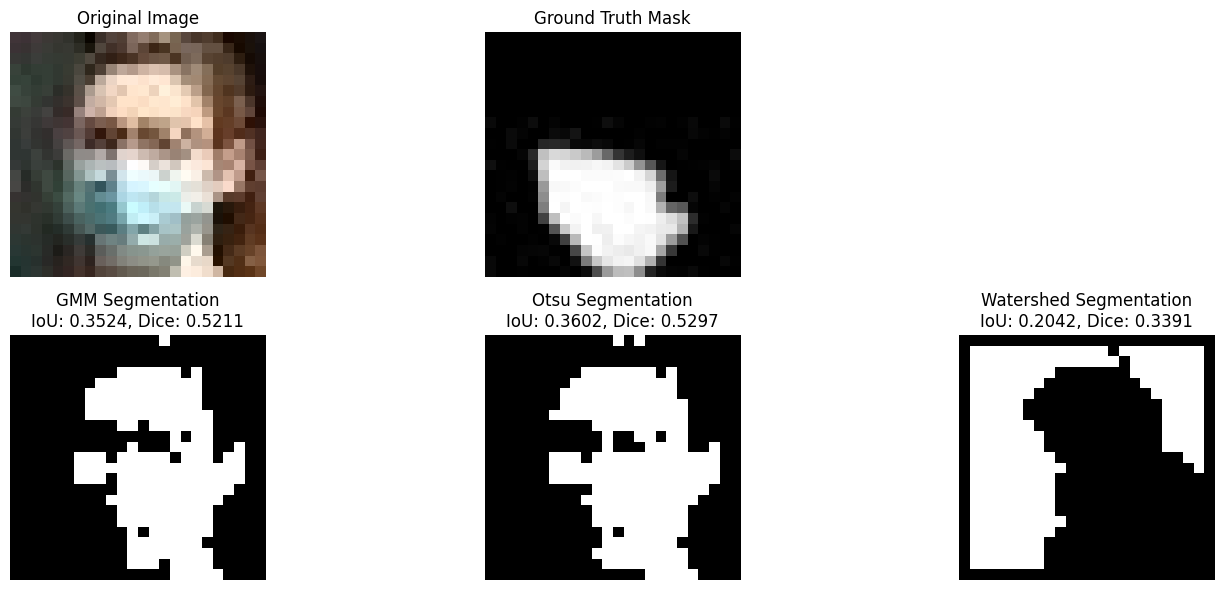

c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


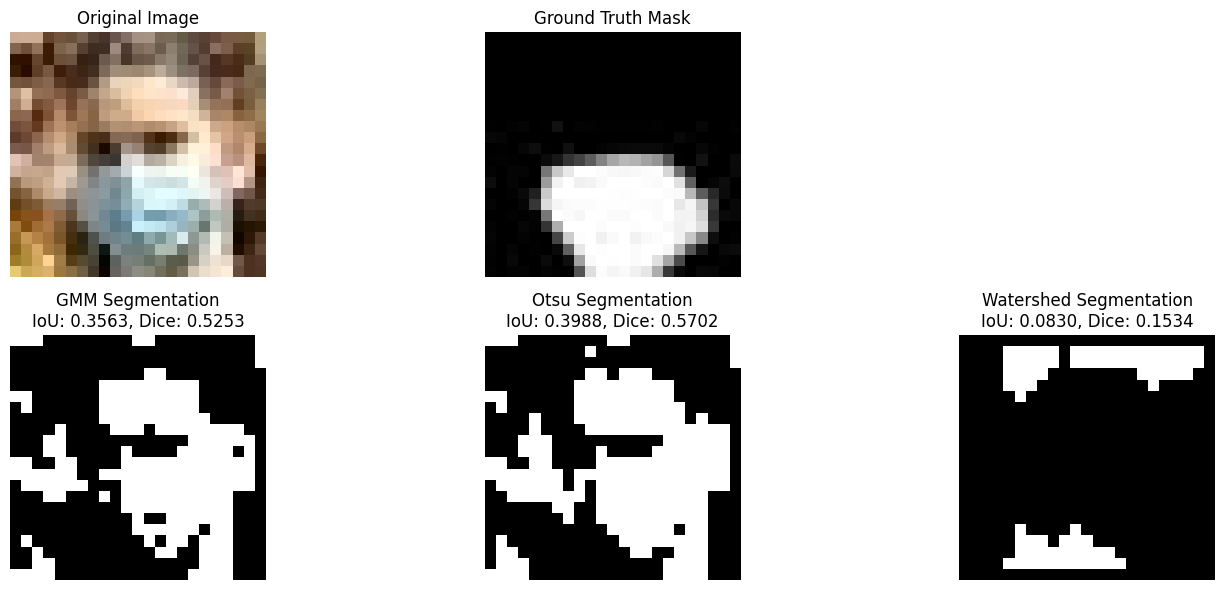

c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


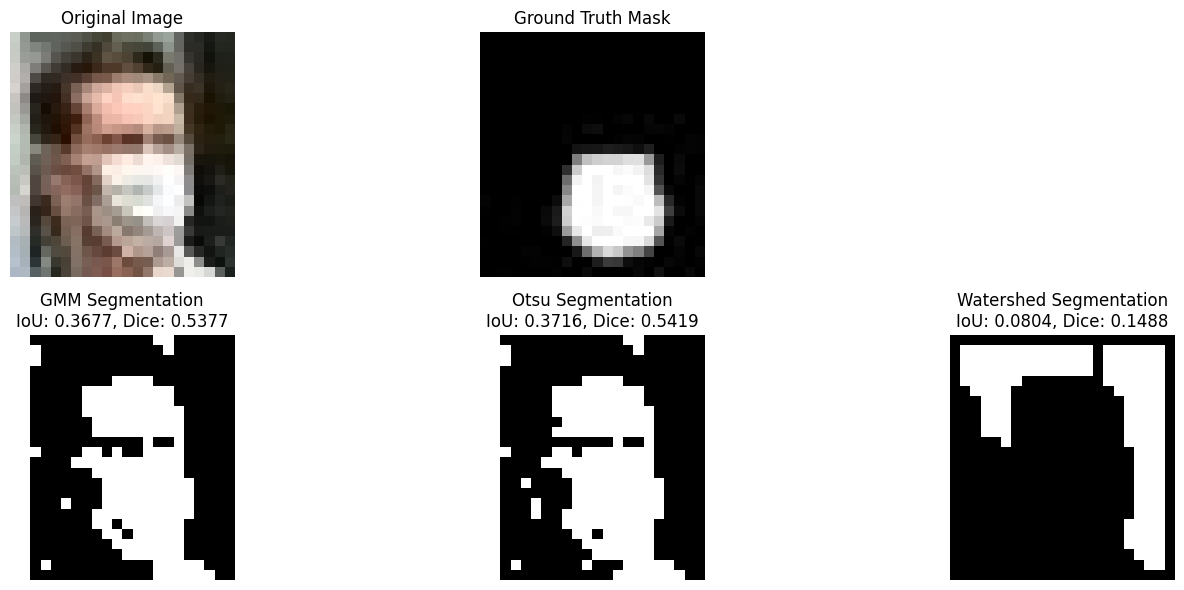

c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


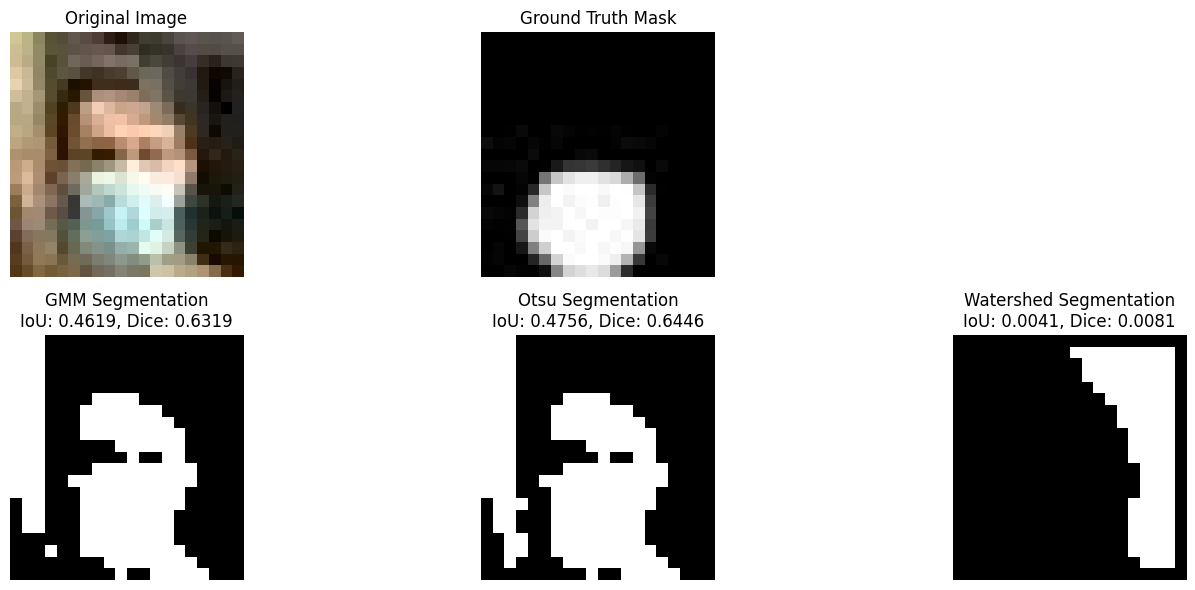

c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


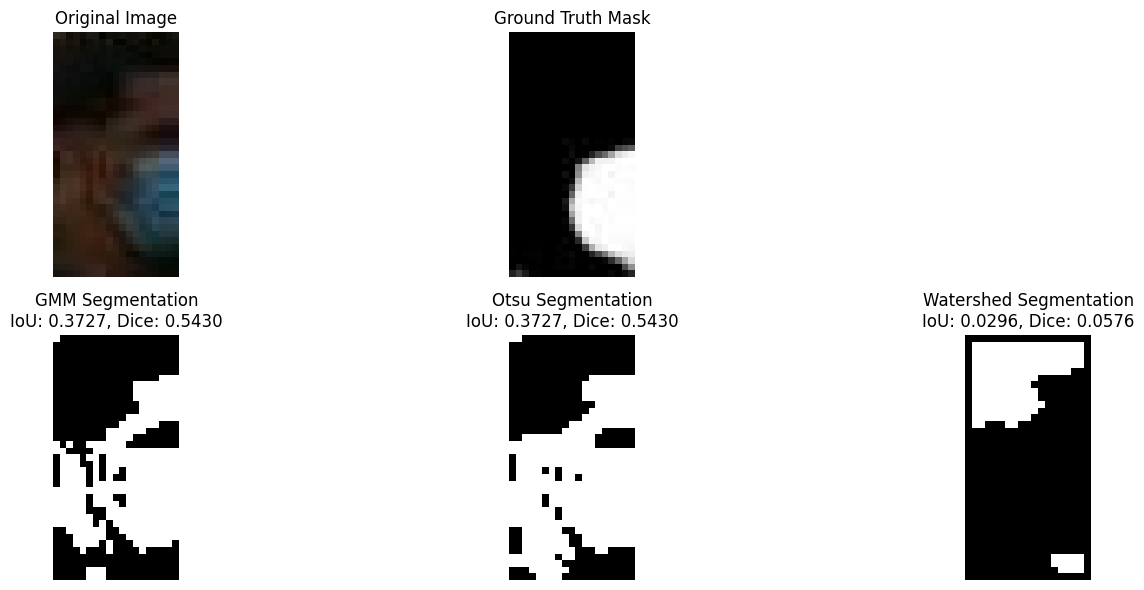

c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


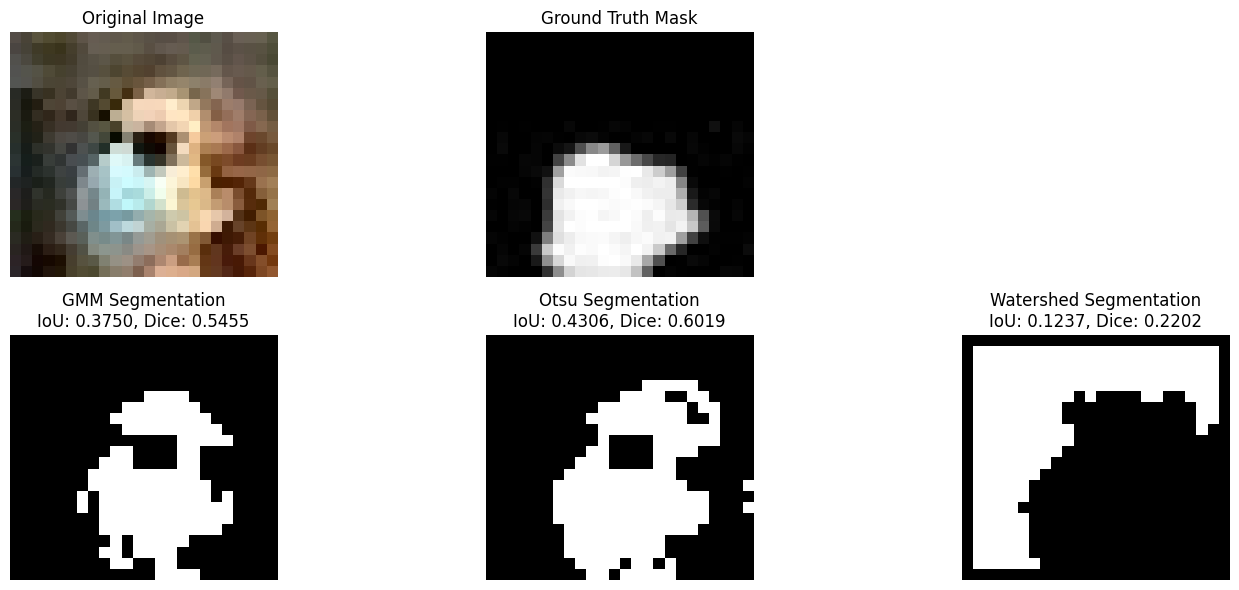

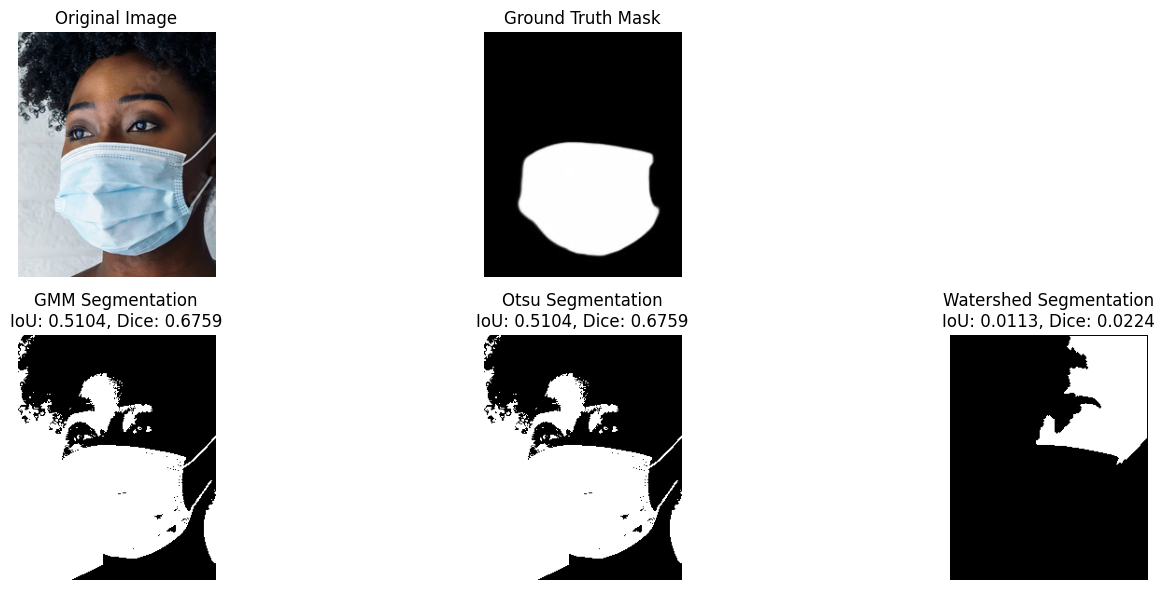

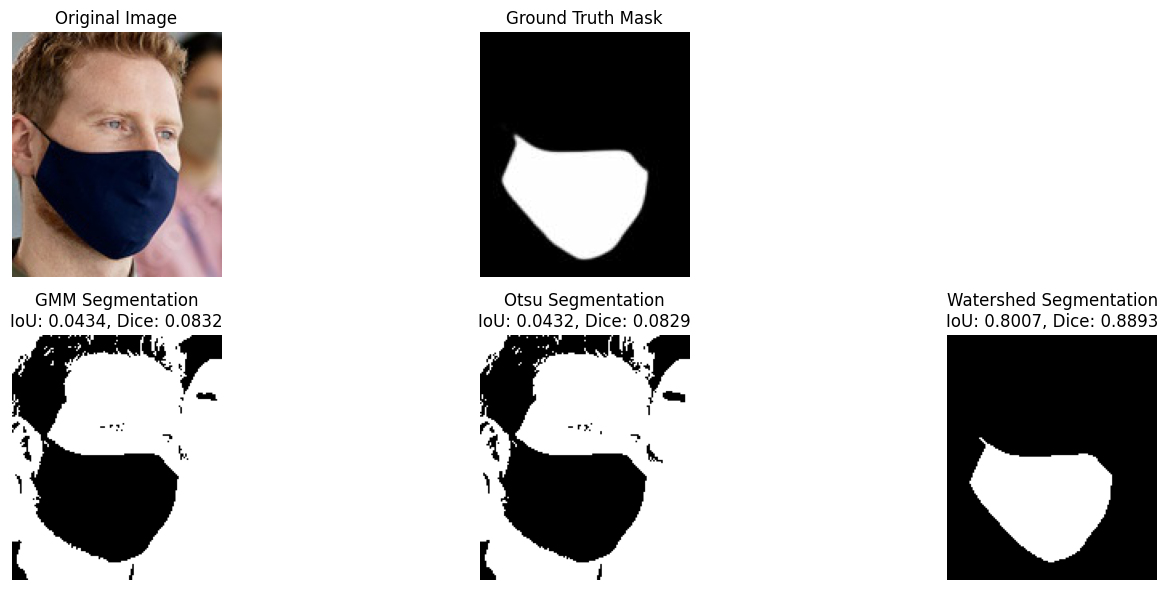

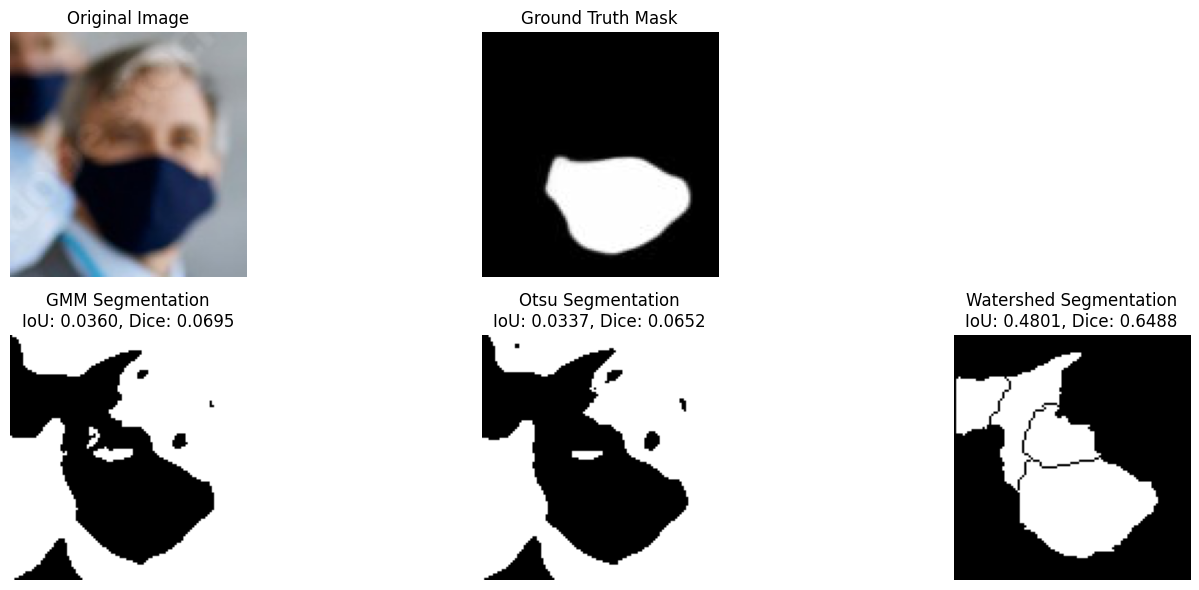

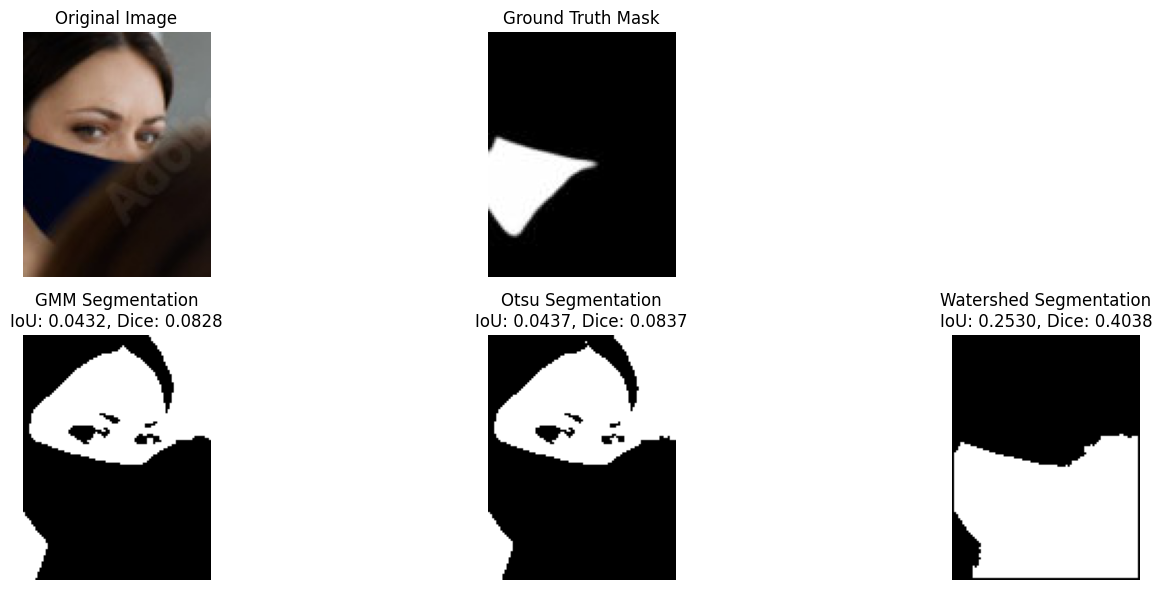

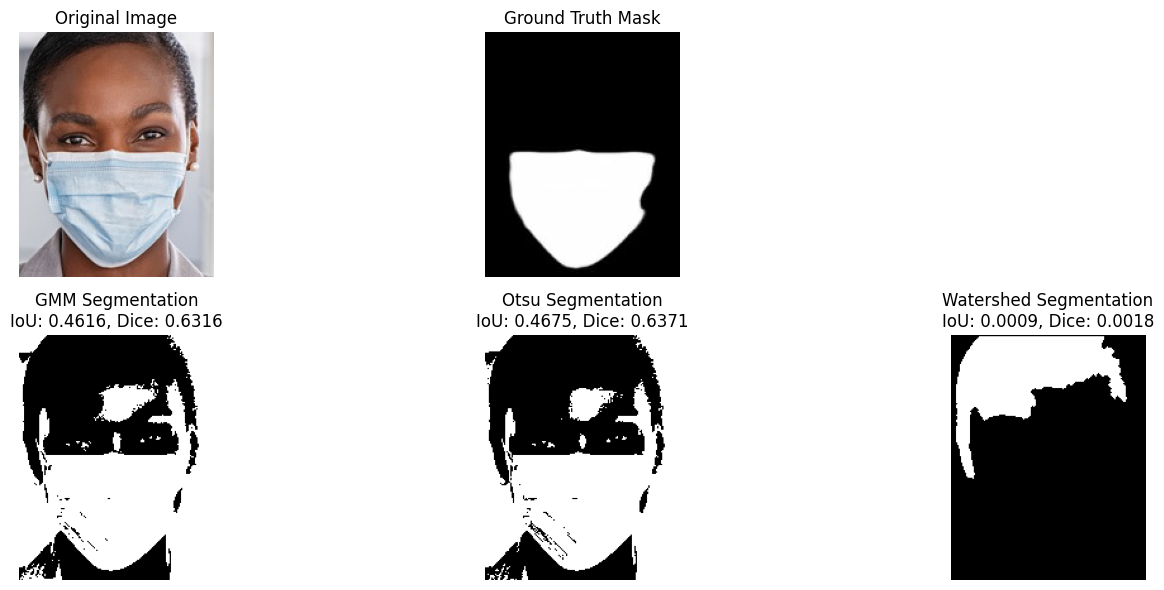

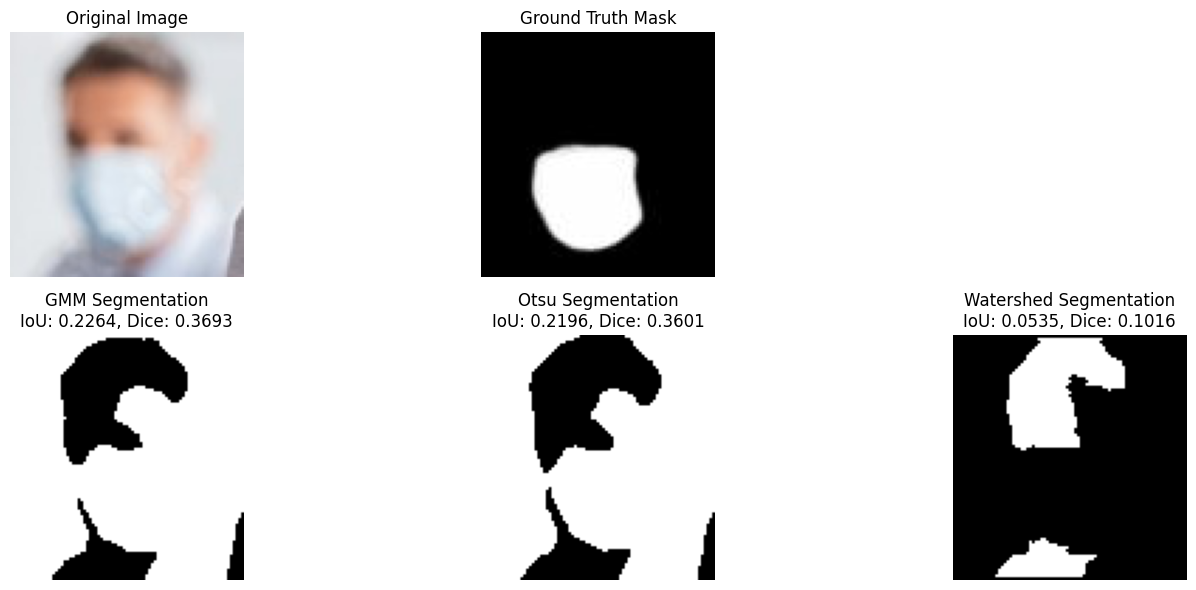

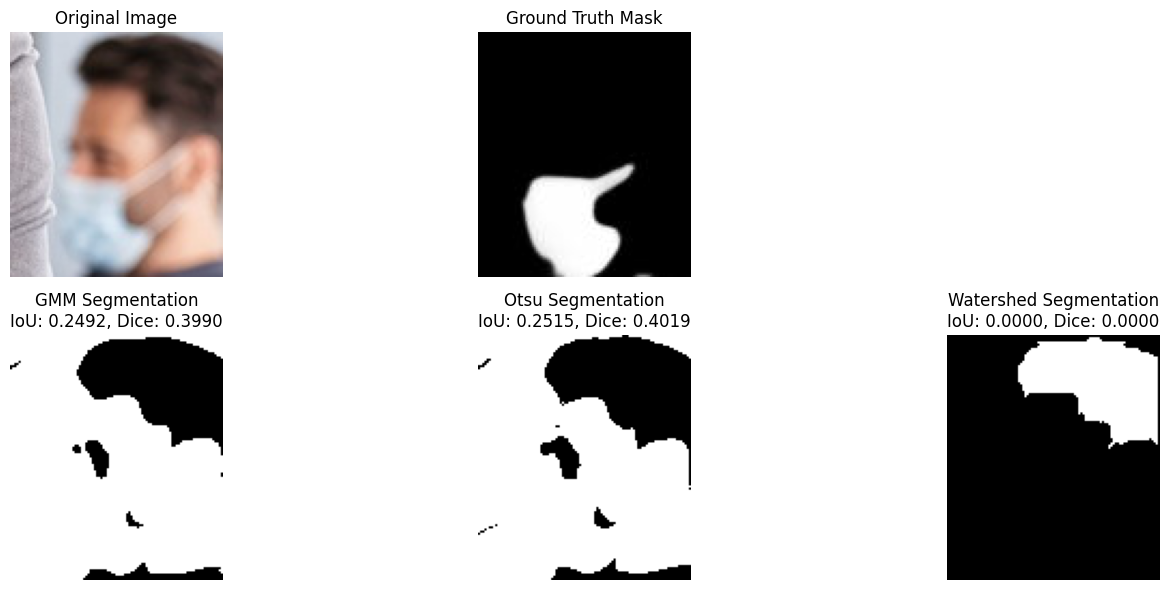

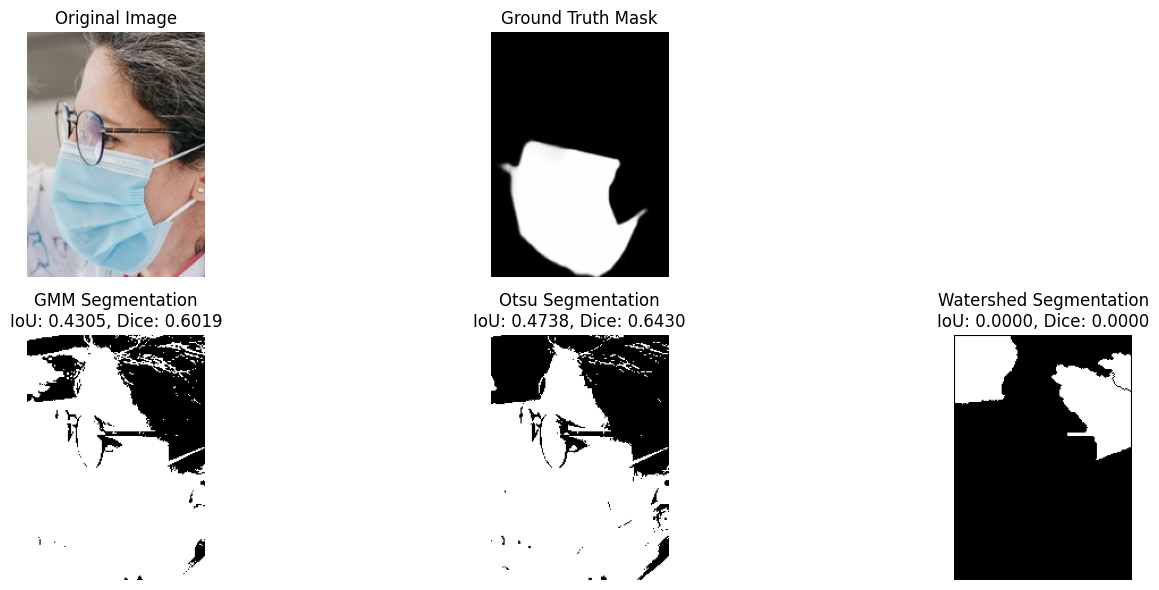

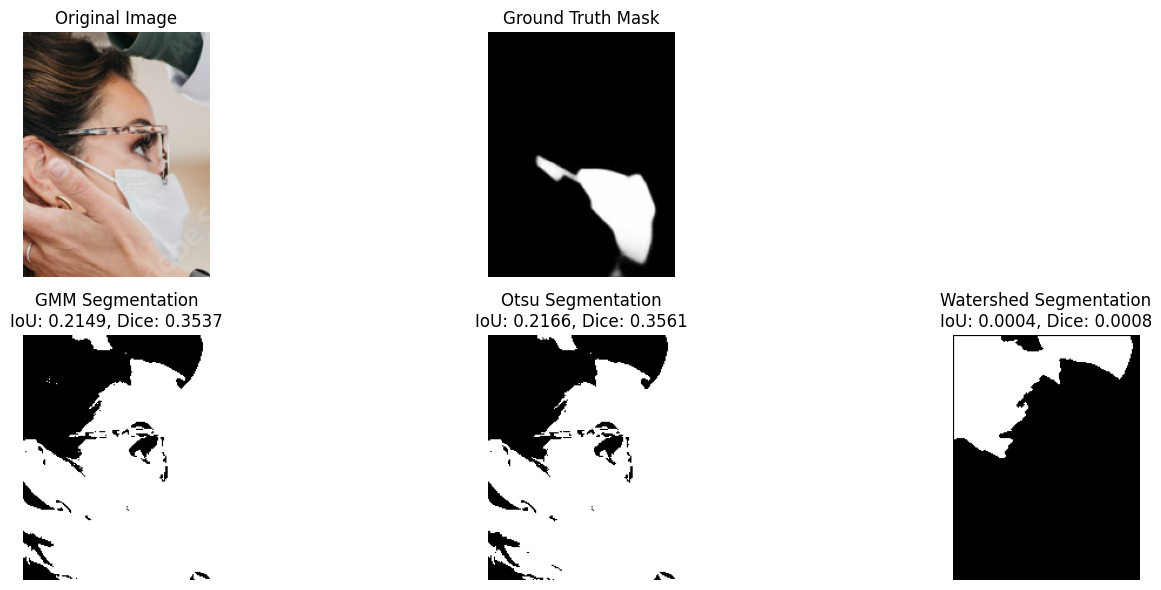

KeyboardInterrupt: 

In [20]:
directory = "../dataset/face_crop"
groundTruth = "../dataset/face_crop_segmentation"

for filename, gt in zip(os.listdir(directory),os.listdir(groundTruth)):
    if filename.lower().endswith((".jpg",".png",".jpeg")):
        image_path = os.path.join(directory, filename)
        gt_path = os.path.join(groundTruth, gt)

        image = cv2.imread(image_path)
        if image is None:
            print("Image not found or unable to load.")
        else:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ground_truth = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)
            mask_gmm = segment_gmm(image)
            mask_otsu = segment_otsu(image)
            mask_watershed = segment_watershed(image)
            iou_gmm, dice_gmm = compute_metrics(mask_gmm, ground_truth)
            iou_otsu, dice_otsu = compute_metrics(mask_otsu, ground_truth)
            iou_watershed, dice_watershed = compute_metrics(mask_watershed, ground_truth)

            # Display Results
            plt.figure(figsize=(15, 6))

            plt.subplot(2, 3, 1)
            plt.imshow(image)
            plt.title("Original Image")
            plt.axis("off")

            plt.subplot(2, 3, 2)
            plt.imshow(ground_truth, cmap="gray")
            plt.title("Ground Truth Mask")
            plt.axis("off")

            plt.subplot(2, 3, 4)
            plt.imshow(mask_gmm, cmap="gray")
            plt.title(f"GMM Segmentation\nIoU: {iou_gmm:.4f}, Dice: {dice_gmm:.4f}")
            plt.axis("off")

            plt.subplot(2, 3, 5)
            plt.imshow(mask_otsu, cmap="gray")
            plt.title(f"Otsu Segmentation\nIoU: {iou_otsu:.4f}, Dice: {dice_otsu:.4f}")
            plt.axis("off")

            plt.subplot(2, 3, 6)
            plt.imshow(mask_watershed, cmap="gray")
            plt.title(f"Watershed Segmentation\nIoU: {iou_watershed:.4f}, Dice: {dice_watershed:.4f}")
            plt.axis("off")

            plt.tight_layout()
            plt.show()

